# Mục mới

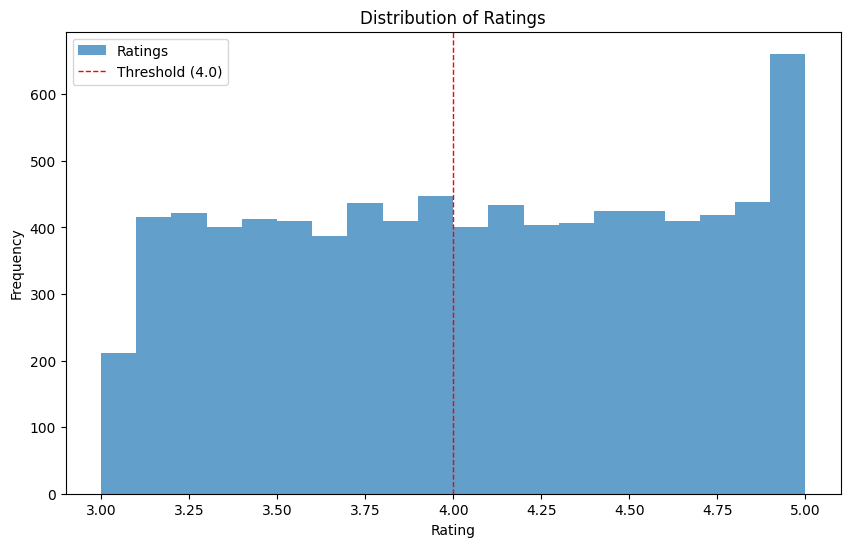

Sample proportion (p̂): 0.48
z value: -3.61
p-value: 0.0003
95% confidence interval for the proportion: (0.4695774551865254, 0.49098659835075953)
Conclusion: Reject the null hypothesis H0.


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Read data from CSV file
file_path = '/content/restaurant.csv'
data = pd.read_csv(file_path)

# Set hypotheses
# H0: The proportion of restaurants with ratings over 4.0 is 50% (p = 0.5)
# H1: The proportion of restaurants with ratings over 4.0 is not 50% (p ≠ 0.5)

# Create a boolean column for restaurants with ratings over 4.0
data['High_Rating'] = data['Rating'] > 4.0

# Hypothesis testing: the proportion of restaurants with ratings over 4.0 is 50%
p0 = 0.5  # hypothesized proportion
p_hat = data['High_Rating'].mean()  # sample proportion
n = len(data)  # sample size

# Calculate z value
z = (p_hat - p0) / np.sqrt(p0 * (1 - p0) / n)

# Calculate p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Calculate 95% confidence interval for the proportion
conf_int = stats.norm.interval(0.95, loc=p_hat, scale=np.sqrt(p_hat * (1 - p_hat) / n))

# Illustrate results with a plot
plt.figure(figsize=(10, 6))
plt.hist(data['Rating'], bins=20, alpha=0.7, label='Ratings')
plt.axvline(4.0, color='red', linestyle='dashed', linewidth=1, label='Threshold (4.0)')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Hypothesis test results and confidence interval
alpha = 0.05  # significance level
print(f"Sample proportion (p̂): {p_hat:.2f}")
print(f"z value: {z:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"95% confidence interval for the proportion: {conf_int}")

# Conclusion
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis H0.")
else:
    print("Conclusion: Do not reject the null hypothesis H0.")
